In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Long Short-Term Memory (LSTM) Networks**


## 1. Introduction

* **LSTM** is a special type of RNN designed to **solve the vanishing gradient problem**.
* It can **capture long-term dependencies** in sequences.
* Widely used in **language modeling, machine translation, speech recognition, and time series prediction**.


## 2. Key Idea

* LSTM introduces a **cell state** (C_t) that acts as a **memory**.
* Uses **gates** to control information flow:

  1. **Forget Gate** (f_t) – decides what to discard from memory
  2. **Input Gate** (i_t) – decides what new information to store
  3. **Output Gate** (o_t) – decides what part of memory to output



## 3. LSTM Equations

For time step (t), given input (x_t) and previous hidden state (h_{t-1}):

1. **Forget gate** – which information to forget:
   [
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   ]

2. **Input gate** – which information to update:
   [
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   ]

3. **Candidate memory** – new information to potentially add:
   [
   \tilde{C}*t = \tanh(W_C \cdot [h*{t-1}, x_t] + b_C)
   ]

4. **Update cell state**:
   [
   C_t = f_t * C_{t-1} + i_t * \tilde{C}_t
   ]

5. **Output gate** – decide hidden state output:
   [
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   ]

6. **Hidden state**:
   [
   h_t = o_t * \tanh(C_t)
   ]

Where:

* (\sigma) = sigmoid activation
* (\tanh) = hyperbolic tangent activation

---

## 4. LSTM Architecture Diagram

```
          ┌───────────────────┐
x_t ─────>│                   │
          │    LSTM Cell      │──> h_t
h_{t-1} ─>│                   │
          └───────────────────┘
             ↑     ↑     ↑
             f_t   i_t   o_t
           (forget)(input)(output)
```

* **Cell state (C_t)** flows through horizontally with minimal modification → preserves long-term memory.

---

## 5. Advantages of LSTM

* Solves **vanishing gradient problem** → can learn long-term dependencies
* Gates allow **selective memory**
* Performs well on **sequential data** (text, audio, time series)



## 6. Applications

| Application             | Description                     |
| ----------------------- | ------------------------------- |
| Language Modeling       | Predict next word in a sentence |
| Machine Translation     | Seq2Seq translation tasks       |
| Speech Recognition      | Transcribe audio into text      |
| Time Series Forecasting | Predict stock prices or weather |
| Sentiment Analysis      | Classify sentence sentiment     |



## 7. PyTorch Example

```python
import torch
import torch.nn as nn

# LSTM parameters
input_size = 10    # input features per timestep
hidden_size = 20   # hidden state size
num_layers = 1     # number of LSTM layers
seq_length = 5     # sequence length
batch_size = 3

# Sample input
x = torch.randn(batch_size, seq_length, input_size)

# LSTM layer
lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

# Initialize hidden and cell states
h0 = torch.zeros(num_layers, batch_size, hidden_size)
c0 = torch.zeros(num_layers, batch_size, hidden_size)

# Forward pass
out, (hn, cn) = lstm(x, (h0, c0))
print(out.shape)  # [batch_size, seq_length, hidden_size]
```



## 8. Key Takeaways

* LSTM is a **gated RNN** with a cell state that preserves long-term memory
* Gates control **forgetting, updating, and outputting information**
* Mitigates vanishing gradient problem in deep/long sequences
* Widely used in **sequence prediction, NLP, and time series tasks**

# **States in LSTM**

LSTM networks maintain two types of states at each time step:

1. **Hidden state ((h_t))**
2. **Cell state ((C_t))**

Both are crucial for preserving information across time steps in sequence modeling.



## 1. **Cell State ((C_t))**

* The **main memory** of the LSTM cell.
* Carries long-term information across time steps.
* Updated **selectively** by gates:

  * **Forget gate (f_t)** → removes irrelevant info
  * **Input gate (i_t)** → adds new info

**Equation:**

[
C_t = f_t * C_{t-1} + i_t * \tilde{C}_t
]

* (C_{t-1}) = previous cell state
* (\tilde{C}_t) = candidate cell state (new info)
* (f_t) and (i_t) = outputs of forget and input gates

**Key point:** Cell state flows **mostly unchanged** along the sequence, helping mitigate vanishing gradients.



## 2. **Hidden State ((h_t))**

* Represents the **output** of the LSTM cell at time (t).
* Acts as **short-term memory** for the next step and for prediction.

**Equation:**

[
h_t = o_t * \tanh(C_t)
]

* (o_t) = output gate (decides how much of the cell state to output)
* (\tanh(C_t)) = squashes cell state to [-1,1]

**Key point:** Hidden state is what gets passed to **next layer or next time step** in stacked/multi-layer LSTMs.



## 3. Summary of State Flow

```
Time t-1:
C_{t-1} ----\
             \
              \
               [LSTM cell] ---> h_t
             /
x_t --------/
h_{t-1} ---/
```

* **Cell state ((C_t))**: long-term memory (horizontal flow)
* **Hidden state ((h_t))**: output for current time step (vertical flow)



## 4. Visualizing States in LSTM

```
       ┌─────────────────────────────┐
x_t -->│                             │--> h_t (hidden state)
h_{t-1}->                             |
       │      LSTM Cell              │
C_{t-1}->                             |--> C_t (cell state)
       └─────────────────────────────┘
```

* Cell state flows through the sequence **with minimal changes**, controlled by gates.
* Hidden state carries **output information** for the current step and next layers.


Text(0.5, 1.0, 'LSTM Architecture')

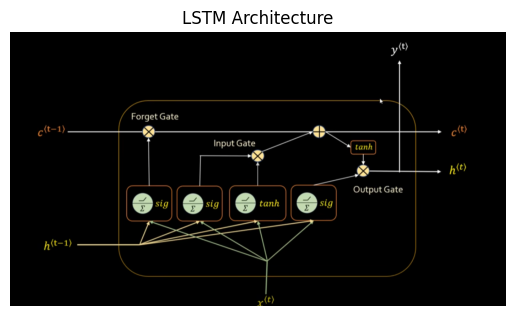

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path =  "/kaggle/input/arc-png/Screenshot 2025-10-11 115642.png"
img = mpimg.imread(path)

plt.axis('off')
plt.imshow(img)
plt.title("LSTM Architecture")

# Key Components of LSTM

### 1. **Cell State ((C_t))**

* The **long-term memory** of the network.
* Flows through the sequence **mostly unchanged**.
* Enables the network to **retain information over long sequences**.

**Keep in mind:** This is what allows LSTM to handle long-term dependencies and avoid vanishing gradients.



### 2. **Hidden State ((h_t))**

* Represents the **output at each time step**.
* Acts as **short-term memory**, passed to the next step and possibly to output layers.

**Keep in mind:** Hidden state is what is actually used for predictions or feeding into the next layer.


### 3. **Forget Gate ((f_t))**

* Decides **what to remove** from the cell state.
* Output ranges between 0 (forget everything) and 1 (keep everything).

**Keep in mind:** Forget gate allows selective memory, preventing irrelevant past info from influencing the future.



### 4. **Input Gate ((i_t)) & Candidate Cell State ((\tilde{C}_t))**

* Input gate decides **what new information to add** to the cell state.
* Candidate cell state contains the **new content** to potentially store.

**Keep in mind:** Together, these gates **update the memory** based on current input and previous state.



### 5. **Output Gate ((o_t))**

* Decides **how much of the cell state to output** as hidden state (h_t).
* Controls what the network “reveals” at each time step.

**Keep in mind:** Output gate manages the balance between cell memory and prediction/output.



### 6. **Gate Mechanism**

* Gates (forget, input, output) are all **sigmoid activations** producing values between 0 and 1.
* Gates **modulate the flow of information**, not just pass it directly.

**Keep in mind:** The gating mechanism is the **core innovation of LSTM**, enabling long-term dependency learning.



### 7. **Key Takeaways**

* **Cell state** → long-term memory
* **Hidden state** → short-term output
* **Forget gate** → selective forgetting
* **Input gate** → selective updating
* **Output gate** → selective output
* **Gates + cell state** → the reason LSTM overcomes vanishing gradients